In [1]:
import lineRenderWorldSetup as LR
import cv2
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt


In [2]:
#select image and translational offset
path = r"3dTo2d\orthogonal_view_first.png"
img = cv2.imread(path, 0)
dim, _ = img.shape[:2]
box_dim = LR.BOX_DIM
offset = 5
T_pospos = np.float32([[1,0,offset],[0,1,offset]])
T_posneg = np.float32([[1, 0, offset],[0, 1, -offset]])
T_negpos = np.float32([[1, 0, -offset],[0, 1, offset]])
T_negneg = np.float32([[1, 0, -offset],[0, 1, -offset]])


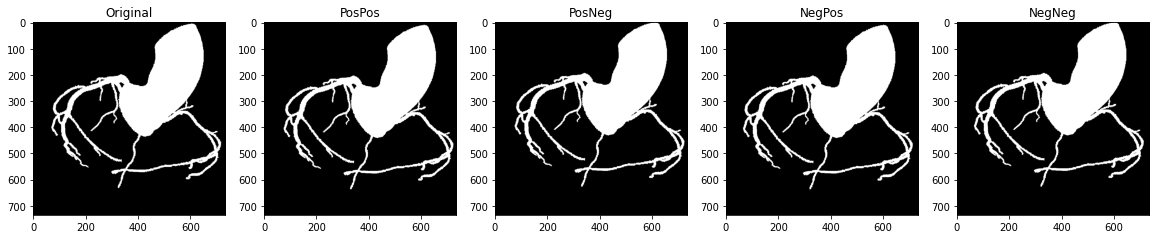

In [3]:
#translate image
img_pp = cv2.warpAffine(img, T_pospos, (dim, dim))
img_pn = cv2.warpAffine(img, T_posneg, (dim, dim))
img_np = cv2.warpAffine(img, T_negpos, (dim, dim))
img_nn = cv2.warpAffine(img, T_negneg, (dim, dim))

plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.imshow(img, cmap="gray")
plt.title("Original")

plt.subplot(1, 5, 2)
plt.imshow(img_pp, cmap="gray")
plt.title("PosPos")

plt.subplot(1, 5, 3)
plt.imshow(img_pn, cmap="gray")
plt.title("PosNeg")

plt.subplot(1, 5, 4)
plt.imshow(img_np, cmap="gray")
plt.title("NegPos")

plt.subplot(1, 5, 5)
plt.imshow(img_nn,cmap="gray")
plt.title("NegNeg")

plt.show()


In [8]:
#create back-projection for each image
imgs = [img, img_pp, img_pn, img_np, img_nn]
boxes = []

for i in imgs:
  line_coords = LR.createCoordsForLoadedImageFrom3d(i,True,dim)
  world_coords = LR.performBresenham3D(line_coords, LR.DETECTOR_TO_PATIENT, LR.SRC_TO_PATIENT, box_dim)
  box = LR.savePointsWithinSquare(world_coords, box_dim)
  boxes.append(box)
  print("produced box")


produced box
produced box
produced box
produced box
produced box


In [10]:
#find uncertancy
uncertainty = []

#loop all translated boxes and calculate overlap
box_img = boxes[0]
for b in boxes[1:]:
  box_sum = box_img + b
  box_sum = np.where(box_sum==2,1,0) #save overlap
  uncertainty.append(np.sum(box_sum))

print(uncertainty/np.sum(box_img))

[0.86504672 0.87224071 0.87677049 0.86213996]


In [ ]:
#render box(es)
x, y, z = LR.boxToWorldCorrds(boxes[0], box_dim)



In [ ]:
mlab.points3d(x, y, z,
              mode="cube", color=(1, 0, 0.5), scale_factor=1, opacity=1)
mlab.show()
